<a href="https://colab.research.google.com/github/NihalSidhu/Runningback-Touchdown-Regression/blob/main/Runningback_TD_Regression_Candidates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running Back Touchdown Candidates

# Table of Contents
- The Value of Touchdowns
- The Big Question
- Regressing to Touchdown Averages
- Touchdown Probability - Data Collection & Processing
- Touchdown Probability - Model
- Touchdown Probability - Model Visualization
- Expected Touchdowns - Data Collection & Processing
- Expected Touchdowns - Model Deployment
- Touchdown Regression Scores - Insights
- Touchdown Regression Scores - Visualizations
- Conclusion

## The Value of Touchdowns


As we have seen when watching an NFL game, a touchdown is extremely valuable. Similarly, in fantasy football touchdowns are very important to a fantasy team's success. For any receiving or rushing touchdown, a player will receive 6 points and for any touchdown thrown a quarterback will receive 4 points. This allows for touchdowns to cause massive swings in a fantasy football matchup, where a few touchdowns here and there can decide a week. However, when we watch an NFL game, we see many touchdowns, but we also see many scenarios where a player might get really close to a touchdown. Sometimes we might see our fantasy player get close to the endzone, only for our opponent's player to score. One the other hand, we sometimes see a runningback punch it in from the 1 yard line or a runningback breaking multiple tackles on their way to a 60 rushing yard touchdown!

## The Big Question

There are so many different outcomes for any running play and any one play can have a significant impact on our fantasy team. No matter how runningbacks score, it would be fantastic to know which runningbacks might be scoring more or less touchdowns in the 2023 season. We would then be able to draft players with a likelihood to score more touchdowns and avoid those who we expect to score less. This ultimately led me to focus on an overarching question which is: **Is there a way to identify who might score more or less touchdowns in the 2023 NFL season?** Luckily there is a way and it involves regressions.

## Regressing to Touchdown Averages


In this study, we will leverage previous scoring trends combined with runningbacks' performances in 2022 to help decipher which runningbacks are expected to score more or less touchdowns in 2023.

We will look into play by play data from the last 10 years to understand the probability of a RB scoring a touchdown given the number of yards they are away from the endzone. Given these probabilities, we can then apply it to the 2022 RB data. With the probabilities and the 2022 data, we can see each RB's rush attempt from which yard line and see what is the probability of scoring from each rushing attempt. Then we can add up all these probabilities based on the rush attempts to define each players' expected rushing TD values. We can then compare the expected rushing TD values in 2022 versus their actual touchdown data to see who overperformed or underperformed their touchdown total given their quality and quantity of usage.

With this information, we will be able to identify what actual touchdown total each runningback is expected to "regress" to in 2023, whether that means more or less touchdowns. For example, if player A scored 8 touchdowns but they were expected to score 12 in 2022, we can expect them to regress to their expected in 2023 and score more touchdowns. Similary, regressing to their average can mean a bad thing as well, where player B scored 10 touchdowns in 2022 but was only expected to score 7, which means they might regress to their expected value in 2023 and score less touchdowns.

By leveraging the play by play data, touchdown probabilities and 2022 performances, we will be able to identify the expected touchdown totals and identify which runningbacks might regress to greater or worse touchdown totals in 2023. This will hopefully help us identify those who will score more touchdowns in 2023 and target those players in fantasy football leagues.

## Touchdown Probability - Data Collection & Processing

First we will want to develop the touchdown probabilities. We are looking to find the probability of scoring a rushing touchdown from each point of the field so that we can eventually apply it to the runningbacks' play by play data in 2022.

Initially we will be pulling the play by play data from 2018-2022. This data will allow us to find the probabilities of an RB scoring a touchdown given the number of yards they are away from the endzone.

We will use nfl_data_py module from nflfastR. nflFastR is a popular R package in the NFL analytics community (found here: https://www.nflfastr.com/)

In [1]:
%%capture
%pip install nfl_data_py --upgrade

In [2]:
# Importing key libraries to assist
import pandas as pd
import nfl_data_py as nfl
import numpy as np

import warnings; warnings.simplefilter('ignore')

In [3]:
# Importing play by play data from 2018-2022
seasons = range(2018, 2023)
df = nfl.import_pbp_data(seasons)

2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
Downcasting floats.


In [4]:
df.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,1.0,2018_01_ATL_PHI,2018090600,PHI,ATL,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,,0.0,0.0
1,37.0,2018_01_ATL_PHI,2018090600,PHI,ATL,REG,1,ATL,away,PHI,...,None,None,NaN,None,NaN,44987;46263;45070;42515;42450;45599;34465;4040...,00-0031950;00-0033725;00-0026990;00-0029955;00...,00-0033576;00-0034411;00-0033222;00-0031570;00...,11.0,11.0
2,52.0,2018_01_ATL_PHI,2018090600,PHI,ATL,REG,1,ATL,away,PHI,...,None,"2 RB, 1 TE, 2 WR",NaN,"4 DL, 2 LB, 5 DB",NaN,34502;44826;41232;34465;34472;43522;35722;3545...,00-0027027;00-0031279;00-0026997;00-0027215;00...,00-0033876;00-0026990;00-0032803;00-0027865;00...,11.0,11.0
3,75.0,2018_01_ATL_PHI,2018090600,PHI,ATL,REG,1,ATL,away,PHI,...,I_FORM,"2 RB, 1 TE, 2 WR",7.0,"4 DL, 2 LB, 5 DB",4.0,34502;44826;41232;34465;34472;43522;43370;3545...,00-0027027;00-0031279;00-0026997;00-0032392;00...,00-0033876;00-0026990;00-0032803;00-0027865;00...,11.0,11.0
4,104.0,2018_01_ATL_PHI,2018090600,PHI,ATL,REG,1,ATL,away,PHI,...,I_FORM,"2 RB, 1 TE, 2 WR",7.0,"4 DL, 2 LB, 5 DB",NaN,34502;44826;41232;34465;34472;43522;35722;3545...,00-0027027;00-0031279;00-0026997;00-0027215;00...,00-0033876;00-0026990;00-0032803;00-0027865;00...,11.0,11.0


As seen above, we now have all the play by play data from every year from 2018 through 2022. Just from initial glance we can see there are a lot of columns and all of them might not be applicable to us. Lets take a deeper dive into the different columns of data available to us.

In [5]:
# Checking what columns are provided in the dataset
df.columns.values.tolist()

['play_id',
 'game_id',
 'old_game_id',
 'home_team',
 'away_team',
 'season_type',
 'week',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'td_player_name',
 'td_player_id',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'po

We can see that there are many different columns, with a lot of them being useless in our scenario. In our case we are only focusing on runningbacks and their rushes. Hence we will only want to leverage columns that involves running plays, so we can look into columns with common rushing phrases such as 'rush' and 'distance'.

In [6]:
for column in df.columns:
    # Looking for any column associated with rushing
    if 'rush' in column:
        print(column)
    # Looking for any columns associated with yards from endzone
    elif 'distance' in column:
        print(column)
    elif 'yardline' in column:
        print(column)
    # Looking into columns associated with two point attempts so we can remove them
    elif 'two_point' in column:
        print(column)

yardline_100
kick_distance
two_point_conv_result
two_point_conversion_prob
total_home_rush_epa
total_away_rush_epa
total_home_rush_wpa
total_away_rush_wpa
first_down_rush
rush_attempt
rush_touchdown
two_point_attempt
lateral_rush
rusher_player_id
rusher_player_name
rushing_yards
lateral_rusher_player_id
lateral_rusher_player_name
lateral_rushing_yards
defensive_two_point_attempt
defensive_two_point_conv
rusher
rusher_jersey_number
rush
rusher_id
number_of_pass_rushers


By filtering down to rushing related columns, we are able to find some potentially useful columns. I looked into the definitions of each of the filtered columns and was able to come up with the columns that will be applicable in this study. These columns include:


*   "yardline_100": Provides us with a value between 1-99 which indicates how many yards away from the endzone the play started at.
*   "rush_attempt": Provides us with 1 if the play was a rushing attempt and provies 0 if it is not a rushing attempt.
*   "rush_touchdown": Provides us with 1 if the play resulted in a touchdown and provides 0 if there is no touchdown.
*    "two_point_attempt": Provides us with 1 if it is a two point play and provides us 0 if it is a regular play. We want this column in order to remove all 2 point conversions.

All 4 of these columns will allow us to find key data for each rushing play, where we can now see where the play started and whether it resulted in a touchdown or not. Let's filter the dataframe to only include our necessary columns. Along with this, we will only include plays that are rushing plays and that are not two point conversions.

We can then take an initial look at plays from the 1 yard line and how often they ended up as a touchdown.


In [7]:
# Filtering the dataframe to only include relevant columns
rushing_df = df[['rush_attempt', 'rush_touchdown', 'yardline_100', 'two_point_attempt']]

'''
Filtering dataframe to only include rushing plays and plays that are NOT two
point conversions.
'''
rushing_df = rushing_df.loc[(rushing_df['two_point_attempt'] == 0) & (rushing_df['rush_attempt'] == 1)]

# Showcasing rushing plays from the 1 yard line
rushing_df.sort_values(by = 'yardline_100').head(10)


,rush_attempt,rush_touchdown,yardline_100,two_point_attempt
136918,1.0,0.0,1.0,0.0
184418,1.0,1.0,1.0,0.0
184494,1.0,1.0,1.0,0.0
66218,1.0,1.0,1.0,0.0
66134,1.0,1.0,1.0,0.0
184757,1.0,1.0,1.0,0.0
66133,1.0,0.0,1.0,0.0
66132,1.0,0.0,1.0,0.0
184862,1.0,0.0,1.0,0.0
184863,1.0,1.0,1.0,0.0


Now our data frame provides us with all the rushing attempts, along with where the play started and whether a touchdown was scored or not. In the table above, we can see just 10 rushing attempts from the 1 yard line. Just by looking at the first 10 rows we can see that 6 out of 10 rushing attempts from the 1 yard line resulted in a touchdown. With this dataframe, we will now be able to find the probability of scoring from every yard line, using the plays that were scored and not scored from each yard line.

## Touchdown Probability - Model

We will need to group by each yard line and total up the number of times a touchdown was scored on the yard line, divided by the total times a rushing play was ran on that yard line. Let's try that.

In [8]:
"""
Here we are grouping by the yard line (yardline_100) for each play. Following
the grouping, we are using value counts on "rush_touchdown" to find the number
of times a rushing play was a touchdown. However, instead of obtaining counts,
we want a percentage of times a touchdown was scored at each yard line. We can
do this by setting normalize = True, which instead calculates the proportions
of plays that were touchdowns.

From: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

"With normalize set to True, returns the relative frequency by dividing all
values by the sum of values."
"""

rb_td_probs = rushing_df.groupby('yardline_100')['rush_touchdown'].value_counts(normalize = True)

# Setting a new column for each touchdown probability
rb_td_probs = pd.DataFrame({
    'probability_of_touchdown': rb_td_probs.values
}, index=rb_td_probs.index).reset_index()

rb_td_probs.head()

,yardline_100,rush_touchdown,probability_of_touchdown
0,1.0,1.0,0.586648
1,1.0,0.0,0.413352
2,2.0,0.0,0.562102
3,2.0,1.0,0.437898
4,3.0,0.0,0.653775


Now we have the rb_td_probs dataframe that gives us the probability from each yard line. However, the rows where rush_touchdown are 0 is useless because we can already see the probability when a touchdown is scored when rush_touchdown = 1. Let's remove all rows where rush_touchdown is 0.

In [9]:
rb_td_probs = rb_td_probs.loc[rb_td_probs['rush_touchdown'] == 1]
rb_td_probs = rb_td_probs.drop('rush_touchdown', axis=1)
rb_td_probs.head()

,yardline_100,probability_of_touchdown
0,1.0,0.586648
3,2.0,0.437898
5,3.0,0.346225
7,4.0,0.290657
9,5.0,0.235294


## Touchdown Probability - Model Visualization

Now we have a table with the probability of scoring a touchdown from each yard line, let's visualize this to see how the probability of a touchdown changes based on the yard line.

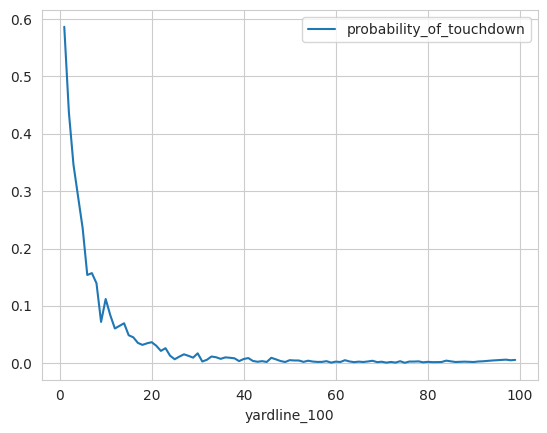

In [10]:
# Importing seaborn to allow for visualizations
import seaborn as sns; sns.set_style('whitegrid');

rb_td_probs.plot(x='yardline_100', y='probability_of_touchdown');

Just by viewing this chart you can see that there is a much higher probability of a touchdown when the yard line is lower. This chart makes sense because as you go further away from the endzone (increase in yardline_100), there is a lesser chance of scoring a touchdown. It seems that there is only about a 10% or higher probability of scoring a touchdown when you are within 10 yards of the endzone. Otheriwse, the probability of scoring a touchdown is low. So for the sake of our analysis, it might be worth finding players who get a lot of rushes within 10 yards of the endzone.

Now that we have the probability of scoring a rushing touchdown from specific yard lines on the field, we can now try to map this with RBs and where they get majority of their rushing touches from. By mapping the probabilities of touchdowns and what yard line running backs get the ball from, we will be able to generate expected touchdowns for runningbacks.

##Expected Touchdowns - Data Collection & Processing

In order to help us understand which runningbacks might have more touchdowns in 2023, we need to look into runningbacks' performances in 2022. We can do this by pulling the play by play data from 2022.

In [11]:
play_data_2022 = nfl.import_pbp_data([2022])

2022 done.
Downcasting floats.


As we discussed earlier, the play by play dataset contains many irrelevant columns. In our case, we only want the rushing player's name, the yard line they rushed from, and whether their rush was a touchdown. Luckily that information is easy to identify by taking the "rusher_player_name", "yardline_100" and the "rush_touchdown". We will also be taking the "rusher_player_id" to help us map the ids to the positions later on.

In [12]:
play_data_2022 = play_data_2022[['rusher_player_name', 'rusher_player_id', 'rush_touchdown', 'yardline_100']].dropna()
play_data_2022.head()

,rusher_player_name,rusher_player_id,rush_touchdown,yardline_100
2,Mi.Carter,00-0036924,0.0,78.0
4,Mi.Carter,00-0036924,0.0,59.0
9,L.Jackson,00-0034796,0.0,64.0
10,K.Drake,00-0033118,0.0,60.0
12,K.Drake,00-0033118,0.0,52.0


Now with the 2022 play by play data, we can join it with our rb_td_probs dataframe. We can join the two dataframes on the "yardline_100". That way, we can see each rushing play from 2022, the probability of it being a touchdown, and whether a touchdown was scored or not.

In [16]:
expected_tds_df = play_data_2022.merge(rb_td_probs, how='left', on='yardline_100')
expected_tds_df.head()

,rusher_player_name,rusher_player_id,rush_touchdown,yardline_100,probability_of_touchdown
0,Mi.Carter,00-0036924,0.0,78.0,0.003263
1,Mi.Carter,00-0036924,0.0,59.0,0.001068
2,L.Jackson,00-0034796,0.0,64.0,0.001871
3,K.Drake,00-0033118,0.0,60.0,0.002804
4,K.Drake,00-0033118,0.0,52.0,0.004745


Now we have a table with each individual rush, the yardline, the probability of them scoring a touchdown and whether they scored a touchdown or not. With this information, we are able to calculate the expected touchdowns in 2022.

##Expected Touchdowns - Model Deployment

With each runningback, we can sum up each rbs' touchdown probabilities (probability_of_touchdown) from each play in the season to get their total expected touchdowns. Similarly, we can add up their totals from the 'rush_touchdown' column to get their total touchdowns in a season. This will allow us to see their expected touchdowns versus their actual touchdowns in 2022.

In [17]:
'''
Grouping by the running back and adding up the "probability_of_touchdown"
column from each play to get their expected touchdowns. Along with this,
summing up their "rush_touchdown" column and the rushing touchdown total.
'''
expected_tds_df = expected_tds_df.groupby(['rusher_player_name', 'rusher_player_id'], as_index = False).agg({
    'probability_of_touchdown': np.sum, # Sum of probability_of_touchdown
    'rush_touchdown': np.sum # Sum of rush_touchdown
}).rename({'probability_of_touchdown': 'Expected Touchdowns'}, axis = 1)

expected_tds_df = expected_tds_df.sort_values(by='Expected Touchdowns', ascending = False)
expected_tds_df.head()

,rusher_player_name,rusher_player_id,Expected Touchdowns,rush_touchdown
206,Ja.Williams,00-0033948,18.382879,17.0
174,J.Hurts,00-0036389,16.139505,18.0
126,E.Elliott,00-0033045,11.949137,12.0
187,J.Mixon,00-0033897,11.718723,8.0
60,C.McCaffrey,00-0033280,11.122189,10.0


Now we are getting to the good stuff. With the expected_tds_df, we are able to see each runningbacks' expected touchdowns and their actualy touchdowns scored. Let's rank the dataframe by which players who had the highest expected touchdowns.

In [18]:
expected_tds_df = expected_tds_df.rename(columns={
    "rusher_player_name": "RunningBack",
    "rusher_player_id":"ID",
    "rush_touchdown": "Actual Touchdowns"
})

expected_tds_df.head(15)

,RunningBack,ID,Expected Touchdowns,Actual Touchdowns
206,Ja.Williams,00-0033948,18.382879,17.0
174,J.Hurts,00-0036389,16.139505,18.0
126,E.Elliott,00-0033045,11.949137,12.0
187,J.Mixon,00-0033897,11.718723,8.0
60,C.McCaffrey,00-0033280,11.122189,10.0
81,D.Cook,00-0033893,10.148344,8.0
176,J.Jacobs,00-0035700,9.859749,12.0
335,T.Etienne,00-0036973,9.834951,6.0
260,M.Sanders,00-0035243,9.712884,13.0
309,S.Barkley,00-0034844,9.358456,12.0


Now we have a table with players who had the highest expected touchdowns in 2022. However, we see a few a quarterbacks in the mix like Jalen Hurts and Josh Allen. Let's map each player to their respective position and only keep the runningbacks.

In [19]:
# Importing the rosters from 2022
positions = nfl.import_seasonal_rosters([2022])
positions = positions[['player_id', 'position']].rename(columns = {"player_id": "ID"})

# Merging the two dataframes on the ID
expected_tds_df = expected_tds_df.merge(positions, on='ID')

#Keeping only the players who are a Running Back
expected_tds_df = expected_tds_df[expected_tds_df['position'] == 'RB'].drop('position', axis=1)

expected_tds_df = expected_tds_df.drop('ID', axis=1)
expected_tds_df.head()

,RunningBack,Expected Touchdowns,Actual Touchdowns
0,Ja.Williams,18.382879,17.0
2,E.Elliott,11.949137,12.0
3,J.Mixon,11.718723,8.0
4,C.McCaffrey,11.122189,10.0
5,D.Cook,10.148344,8.0


Now our expected_tds_df only includes runningbacks, along with their actual touchdowns scored and their expected touchdowns. With this information, we can now see runningbacks' stats and whether their actual touchdowns were higher or lower than their actual touchdowns. All these runningbacks are considered regression candidates because their actual touchdowns should regress to their expected touchdowns, whether that is an increase or decrease. Players with a positive regression score would indicate that the player underperformed and scored less touchdowns than expected. This might be a player that would be worth drafting in fantasy for 2023, given that they had a lot of expected touchdowns. That would make us believe that they would have a lot of expected touchdowns in 2023 again and we could gamble on the fact that the specific player may regress to the expected touchdowns total and score more in 2023.

Similarly, we might want to target players with very negative regression scores. This would mean that a player scored a lot more touchdowns than expected. These players would be valuable as it would indicate that they are good NFL players (scoring in unlikely scenarios) and hence are more likely to produce more points in 2023 as well.

## Touchdown Regression Scores - Insights

With the expected and actual touchdown scores for each runningback, we can now calculate their regression scores. In our case, the regression score refers to the difference between the expected touchdowns and actual touchdowns. We use the term regression score because this is their expected total and we are expecting the players to regress to the expected or what some might term as the mean (regressing to the mean). This will help us determine which runningbacks under performed and over performed, which can help us draft the right runningbacks in 2023.

Lets calculate and take a look at the player's regression scores.

In [20]:
expected_tds_df['Regression Score'] = expected_tds_df['Expected Touchdowns'] - expected_tds_df['Actual Touchdowns']

expected_tds_df.head()

,RunningBack,Expected Touchdowns,Actual Touchdowns,Regression Score
0,Ja.Williams,18.382879,17.0,1.382879
2,E.Elliott,11.949137,12.0,-0.050863
3,J.Mixon,11.718723,8.0,3.718723
4,C.McCaffrey,11.122189,10.0,1.122189
5,D.Cook,10.148344,8.0,2.148344


Now we have the dataframe with each runningback's regression score. Lets first look at overperforming runningbacks. These are the ones who had higher actual touchdowns than expected, indicating that they are effective when with the ball. We can find these by finding the most negative regression score players.

In [21]:
# Runningbacks that overperformed their expected touchdown total
expected_tds_df.sort_values(by='Regression Score').head(15)

,RunningBack,Expected Touchdowns,Actual Touchdowns,Regression Score
11,A.Ekeler,8.964395,15.0,-6.035605
10,D.Henry,9.301475,13.0,-3.698525
32,T.Pollard,5.491010,9.0,-3.508990
12,N.Chubb,8.666471,12.0,-3.333529
8,M.Sanders,9.712884,13.0,-3.287116
33,C.Patterson,5.015689,8.0,-2.984311
9,S.Barkley,9.358456,12.0,-2.641544
6,J.Jacobs,9.859749,12.0,-2.140251
34,J.Conner,4.919563,7.0,-2.080437
15,K.Walker,7.947786,10.0,-2.052214


Looking at the highest negative regression scores table, we can see a few players managed to outperform their 2022 expectations. Some of these players include Austin Ekeler, Derrick Henry and Tony Pollard. These runningbacks were able to consistently outperform their touchdown expectations, indicating that they were often scoring in unlikely scenarios. This would indicate that these players are rather talented, showing to us that we should aim to draft them in 2023. Since they have the ability to outperform their touchdown expectations in 2022, we can make the assumption that they will score quite a few touchdowns in 2023, irregardless of their expected touchdown totals. As we had mentioned earlier, touchdowns means more fantasy points, so these players are great options to draft.

On the other hand, it is important to also account for the number of expected touchdowns these players had. Ekeler, Henry and Pollard were all able to outperform their expectations, but they also had rather high expected touchdown totals. Players that outperformed their low expected touchdown totals (like Mattison and Murray) are ones we might want to avoid. These players often didn't get the high value rushes in the game to score touchdowns in 2022 and there is no indication that they might get higher expected touchdowns in 2022. So players like Mattison and Murray may be 'fool's gold' where they seem like players who score a lot of touchdowns and are talented, but they don't get enough opportunity to score. Hence, we should avoid players with low expected touchdowns in 2022, even if they overperformed.

Since we were able to look into overperforming players, lets also look into players that underperformed. These are players with higher expected touchdowns than they actually scored. We can find this by looking for the highest positive regression scores.

In [22]:
# Runningbacks that underperformed their expected touchdown total
expected_tds_df.sort_values(by='Regression Score', ascending=False).head(10)

,RunningBack,Expected Touchdowns,Actual Touchdowns,Regression Score
19,T.Allgeier,7.020994,3.0,4.020994
7,T.Etienne,9.834951,6.0,3.834951
3,J.Mixon,11.718723,8.0,3.718723
31,B.Robinson,5.714505,2.0,3.714505
20,L.Fournette,6.703239,3.0,3.703239
23,A.Gibson,6.497445,3.0,3.497445
43,J.McKinnon,3.944844,1.0,2.944844
24,D.Pierce,6.300147,4.0,2.300147
40,M.Gordon,4.288257,2.0,2.288257
5,D.Cook,10.148344,8.0,2.148344


By looking at this player we see a bunch of players that we might want to avoid, given that they underperformed in 2022. Players like McKinnon and Gordon are ones we should aim to avoid drafting in 2023. These two should be avoided because they had very low expected touchdowns and scored very few touchdowns. This indicates both that the team doesn't have much faith in them and that they are losing steam/talent. These kinds of players will likely get fewer opportunities in 2023 for touchdowns and will likely be unable to capitalize on these opportunities.


On the other hand, there is some value that can be found within the under performers table. Players like Mixon and Etienne might be worth drafting in 2023. Although they scored less touchdowns than expected in 2022, they still had quite large expected touchdowns (8 and 6 respectively). The large expected touchdowns in 2022 indicates that their coach's have faith in their talents and are putting them in scoring situations. Their lack of touchdowns in 2022 could be viewed from a variety of factors such as weather, poor teammates or luck and hence they had less touchdowns than expected. Players like Mixon and Etienne are worth trying to draft in 2023 under the belief that their actual touchdowns might positively regress to their expected touchdowns in 2023. This would help them score more touchdowns in 2023, and hence lead to more points!


We were able to dive a little into some players we might want to draft in 2023, but how do we know if touchdown regression is real? Let's dive deeper.

## Touchdown Regression Scores - Visualizations

Now that we have regression values for each player, we can now do more fun analysis on the data. One point that has been made but not proven is whether expected touchdowns actually indicate touchdowns for a runningback. We can check this by looking into the correlation for the runningback's expected touchdowns and their actual touchdowns. We will see how correlated the runningback's expected touchdowns is with their actual touchdowns.

In [23]:
correlation = expected_tds_df["Expected Touchdowns"]. corr(expected_tds_df["Actual Touchdowns"])
"The correlation between expected touchdowns and actual touchdowns is {}".format(correlation)

'The correlation between expected touchdowns and actual touchdowns is 0.9154329576962477'

As calculated above, we can see that the correlation value is 0.91. This indicates that there is a strong correlation between the expected touchdowns and the actual touchdowns scored. With this information, we can make the assumption that most players touchdown's will regress to the expected touchdowns values. This confirms to us that players that underperformed a large number of expected touchdowns can be valuable in 2023, as they might regress to their actual expected touchdowns and score significantly more fantasy points. A player like this would be Etienne, who had a high expected touchdowns but didn't score many touchdowns. So we can believe that in 2023, he should score more touchdowns and reach his expected touchdowns total.


Along with this, we mentioned earlier about players like Ekeler who scored significantly more touchdowns than expected. We can view a player like Ekeler in 2023 in two different scenarios. Scenario 1 is where we believe Ekeler will regress to his actual expected touchdowns and believe he will score less touchdowns and hence less fantasy points in 2023. Scenario 2 is where we believe Ekeler is simply an unmatched talent and will continue to overperform the expected touchdowns. Your opinion on whether to draft Ekeler or not will be dependent on your belief of his talent.

Given we know runningbacks' expected touchdowns and actual touchdowns are correlated, we can begin to visualize the data. We can now see how expected touchdowns and actual touchdowns are correlated, and how players match up with the regression line. Lets view the players and look into the candidates we had mentioned earlier like Etienne, Ekeler, Pollard, McKinnon, Murray and Mixon.

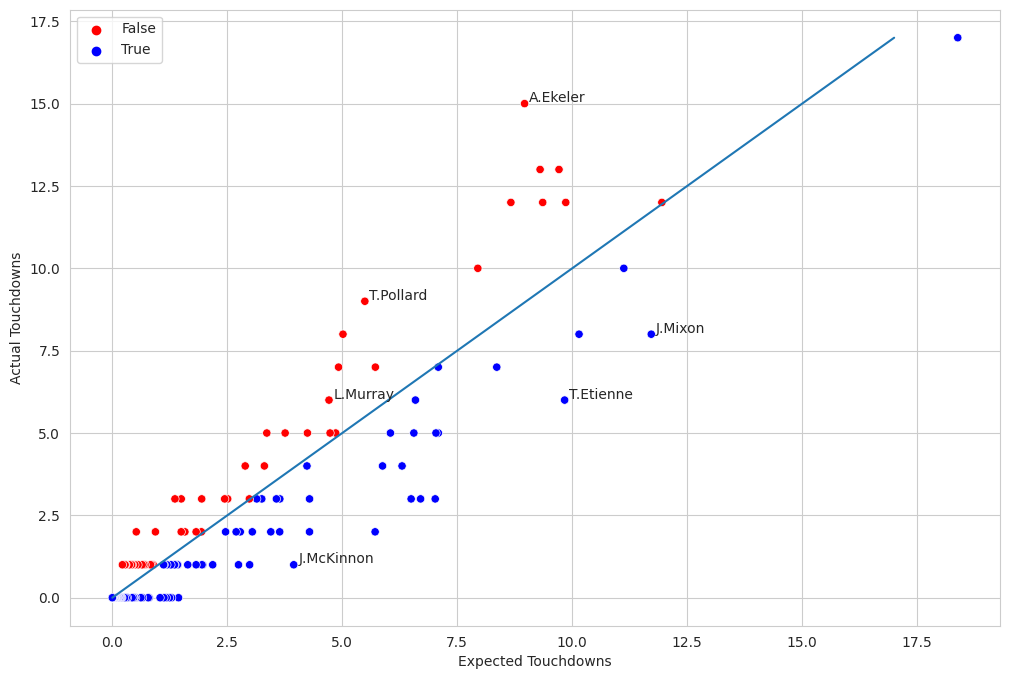

In [24]:
from matplotlib import pyplot as plt;

fig, ax = plt.subplots(figsize=(12, 8))

# Creating a column to decipher between positive and negative regressions
expected_tds_df['Regression Score T/F'] = expected_tds_df['Regression Score'] > 0

sns.scatterplot(
    x = 'Expected Touchdowns',
    y = 'Actual Touchdowns',
    hue = 'Regression Score T/F', # To differentiate positive and negative regressions
    data = expected_tds_df,
    palette = ['r', 'b'] # red and green
);

max_actual_touchdowns = int(expected_tds_df['Actual Touchdowns'].max())
max_expected_touchdowns = int(expected_tds_df['Expected Touchdowns'].max())

max_tds = max(max_actual_touchdowns, max_expected_touchdowns)

# Plotting the line of actual and expected touchdowns
sns.lineplot(x=range(max_tds), y=range(max_tds))

# Adding relevant players we want to highlight
notable_players = ['T.Etienne',  'A.Ekeler', 'T.Pollard', 'J.McKinnon', 'J.Mixon', 'L.Murray']

for _, row in expected_tds_df.iterrows():
    if row['RunningBack'] in notable_players:
        ax.text(
            # Adding the notable players' names
            x = row['Expected Touchdowns']+.1,
            y = row['Actual Touchdowns'] + 0.05,
            s = row['RunningBack']
        )

From the visual, we can see how the actual touchdowns increase as the expected touchdowns increase and we see the various points of data representing players that overperformed and underperformed in the touchdown department. With this visual, we can see how players like Mixon and Etienne could regress to the line and score more touchdowns in 2023. Similarly, we see players like Pollard and Ekeler who could regress to the line and score less touchdowns, or could continue to overperform due to their talent.

## Conclusion

After completing this study we were able to find an answer to our original question which asked if **there a way to identify who might score more or less touchdowns in the 2023 NFL season?** By leveraging both previous years' data and 2022 data we were able to see how much runningbacks overperformed and underperformed in regards to their expected touchdowns in 2022. We can now use this information for the 2023 season to help us identify runningbacks that might score more touchdowns in 2023 or runningbacks that are simply good player that might continue to overperform their expected touchdowns. From a strategy point of view, here is how we can use the data:




*   Aim for runningbacks who had less touchdowns than expected, in the case where their expected touchdowns were high (Mixon, Etienne). We will hope that in 2023 they actually score the expected amount.
*   Aim for runningbacks who had significantly higher touchdowns than expected, in the case where the expected touchdowns is already high. (Ekeler and Pollard). We will assume that these players are outright talented NFL players and we will be on their talent in the sense that we expect them to overperform again.
*   Avoid runningbacks who had less touchdowns than expected in the case where their expected touchdowns were low (McKinnon). We believe that they are both not as talented and do not receive enough opportunities to score many touchdowns in 2023.
*   Generally, avoid runningbacks with low expected touchdowns, given that these players have few opportunities to score and hence will have fewer opportunities to score significant fantasy points.





Along with fantasy football, we can also use the touchdown analysis regression for betting. If you participate in sports betting, you will be able to leverage this analysis to make bets on runningbacks' season long touchdown odds. If a runningback underperformed in 2022, you might want to bet the over on their touchdowns in 2023 where you expect them to regress positively. On the other hand, if a runningback overperformed in 2022, you can take the risk and bet the under on their touchdown total, hoping they regress back down to their expected.

I hope you were able to understand how touchdown regression candidates are determined in football and how we can leverage this information to draft and bet on players to score more touchdowns in 2023!

Saving a csv file version of the td regression candidates to be used when drafting.

In [28]:
from google.colab import files

# Saving the rankings as a csv file
expected_tds_df.to_csv('RunningbackTouchdownRegression.csv', encoding = 'utf-8-sig')
files.download('RunningbackTouchdownRegression.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>